In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import xgboost as xgb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)
import seaborn as sns
from ipynb.fs.full.Performance_Utilities import calculate_optimal_threshold, print_metrics
from utils.create_features_utils import *
from sklearn.base import clone
import os

In [2]:
df = pd.read_csv('data/wimbledon_matches_with_feature.csv')
raw_tennis_file = "data/mens/combined_raw_data.csv"
round_16_file = "data/wimbledon_2019.csv"

In [3]:
round_16 = pd.read_csv(round_16_file) # Round of 16 and on from Wimbledon 2019
raw_tennis = pd.read_csv(raw_tennis_file) # Raw tennis file

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (27,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_grass',
 'diff_games_win_percent_grass',
 'diff_5_set_match_win_percent_grass',
 'diff_close_sets_percent_grass',
 'diff_match_win_percent_52',
 'diff_games_win_percent_52',
 'diff_5_set_match_win_percent_52',
 'diff_close_sets_percent_52',
 'diff_match_win_percent_grass_60',
 'diff_games_win_percent_grass_60',
 'diff_5_set_match_win_percent_grass_60',
 'diff_close_sets_percent_grass_60',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_grass_hh',
 'diff_games_win_percent_grass_hh']

In [5]:
df = df.dropna()

df['diff_rank'] = df['player_0_rank'] - df['player_1_rank']

In [6]:
# Train-test split
y = df.outcome
X = df[features_list]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, shuffle=True, test_size=0.20)

In [7]:
# Final to predict on
round_16['Date'] = '2019/07/07'
round_16['Surface'] = 'Grass'
round_16['diff_rank'] = round_16['player_0_rank'] - round_16['player_1_rank']

wimby_2019 = create_features(round_16, raw_tennis) # Round 16 and on Wimby 2019
X_wimby_2019 = wimby_2019[features_list]

Creating Player Career Stats All Surface
Creating Player Career Stats on Grass/Clay/Hard
Creating Player Career Stats All Surface Last 52 Weeks
Creating Player Career Stats on Grass/Clay/Hard Last 60 Weeks
Creating Player Head to Head Career Stats All Surface
Creating Player Head to Head Career Stats On Grass
Creating Difference Variables


[(300, 7), (300, 10), (300, 12), (300, 14), (500, 7), (500, 10), (500, 12), (500, 14), (1000, 7), (1000, 10), (1000, 12), (1000, 14)]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http

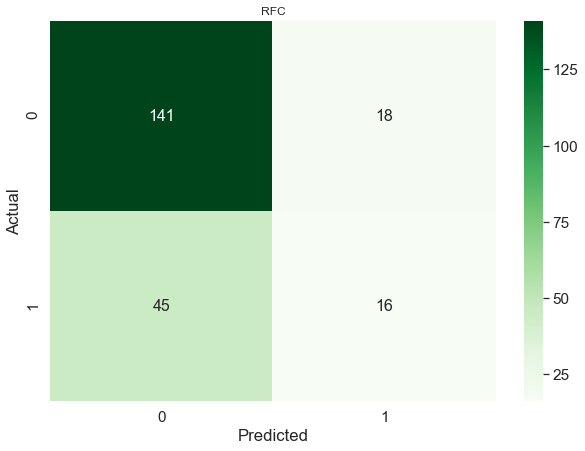

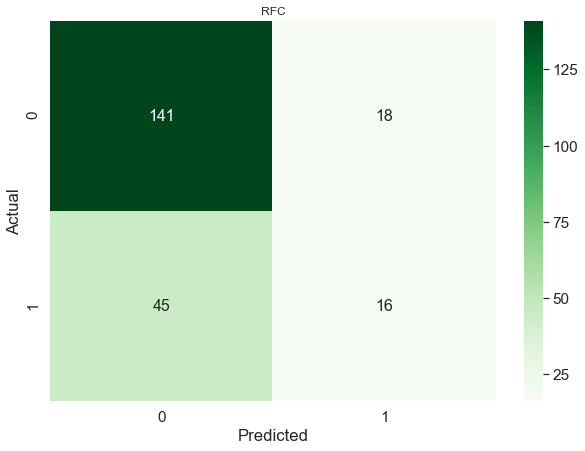

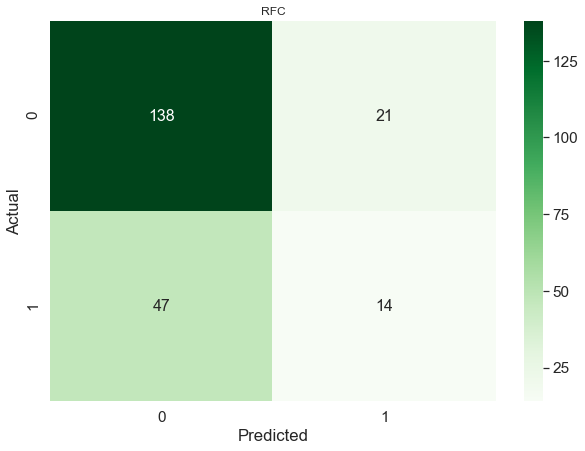

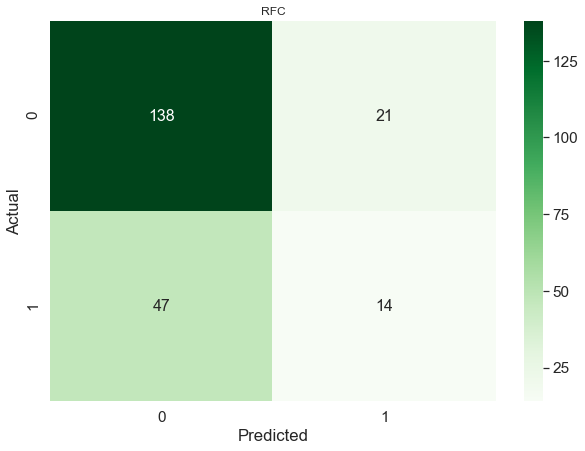

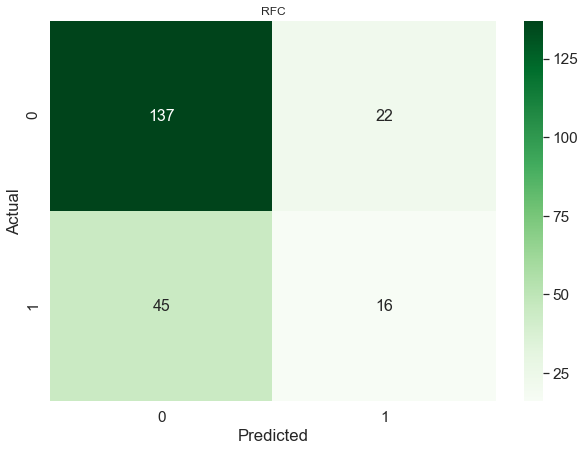

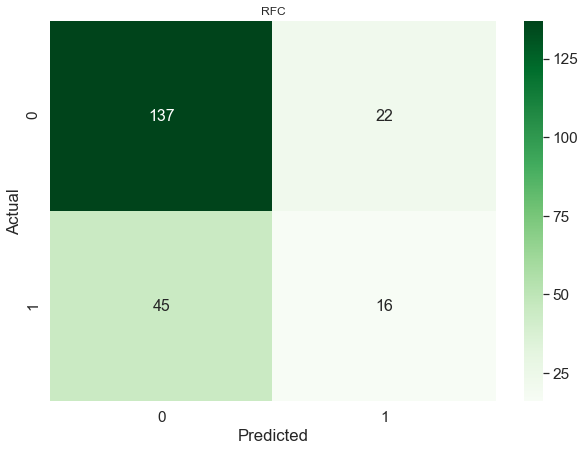

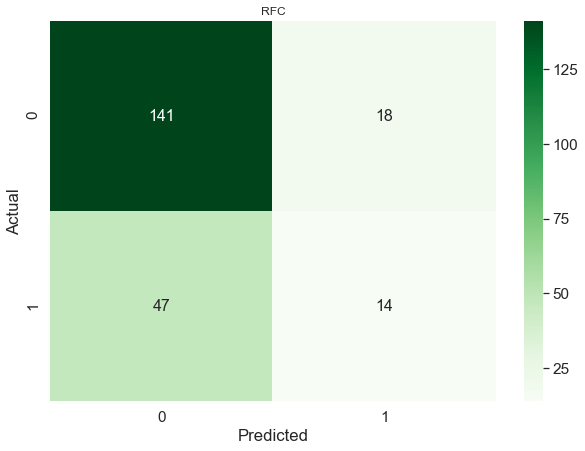

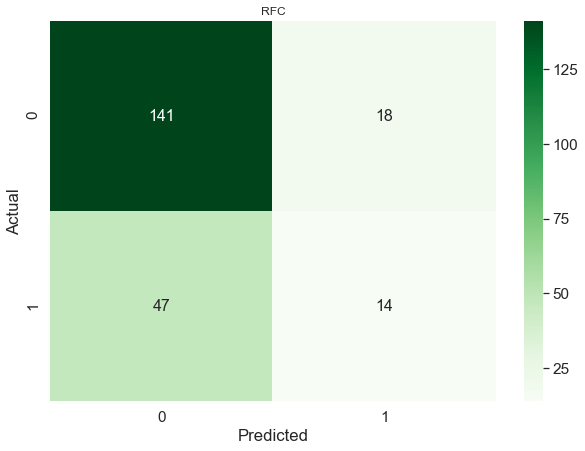

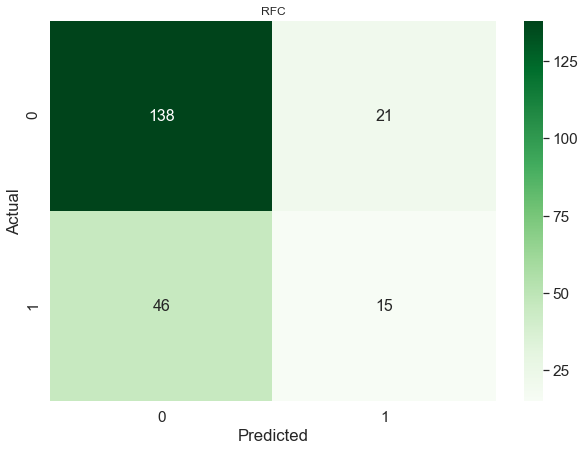

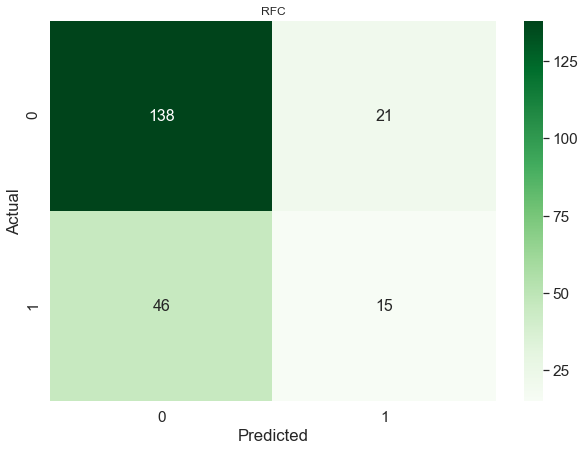

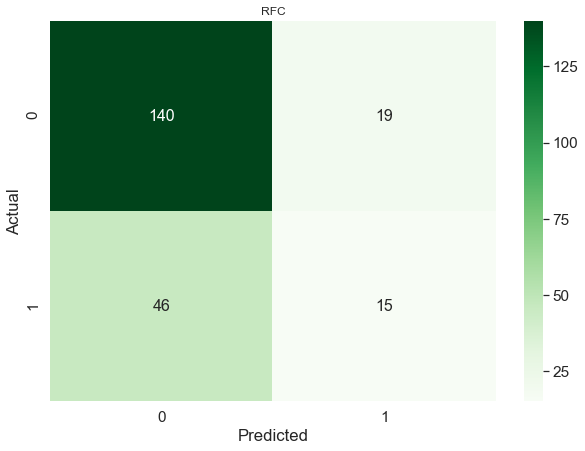

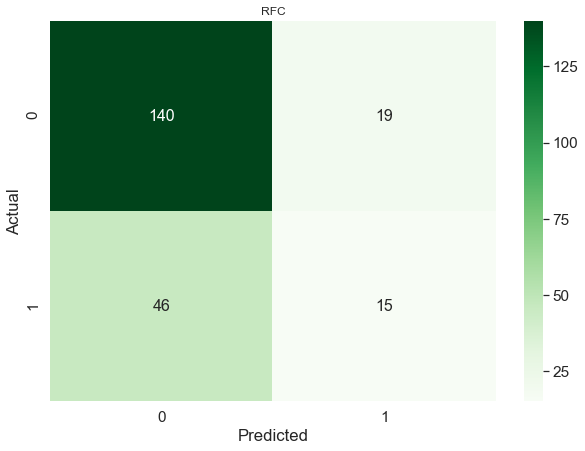

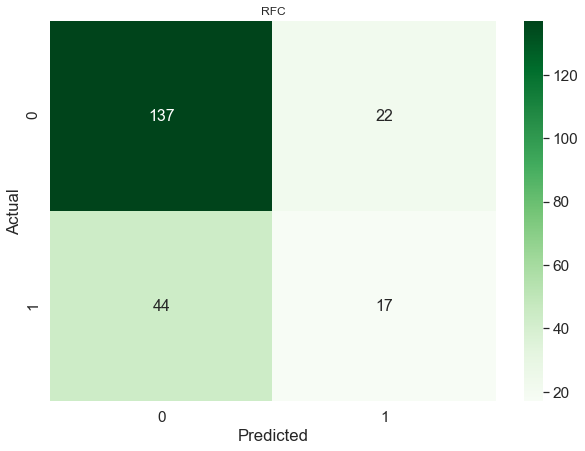

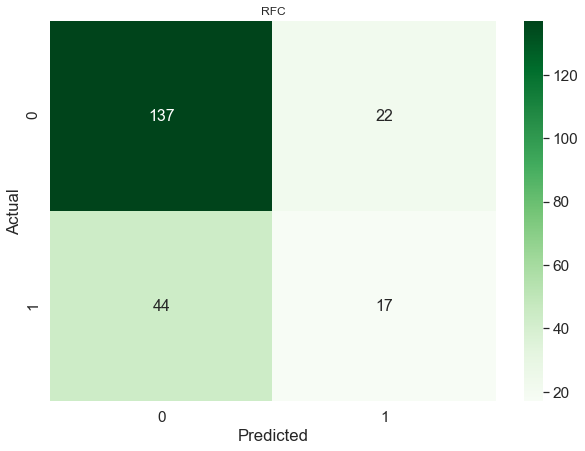

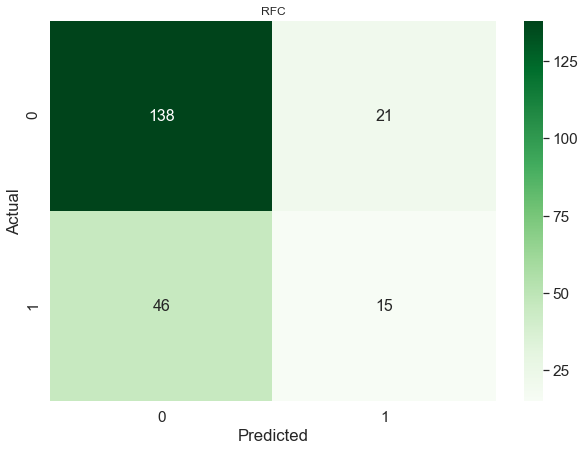

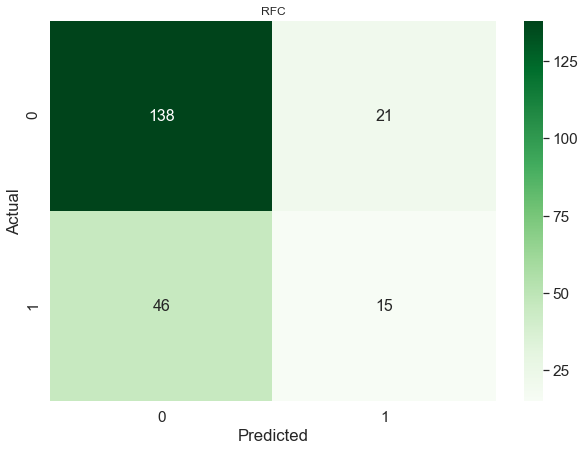

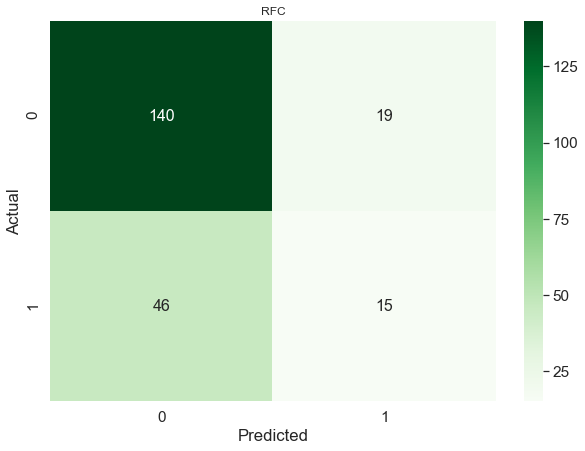

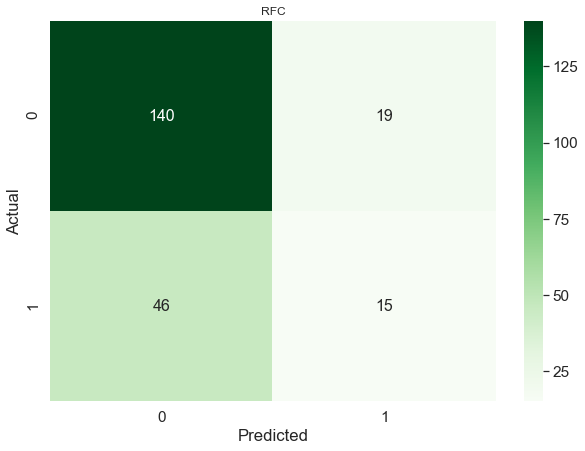

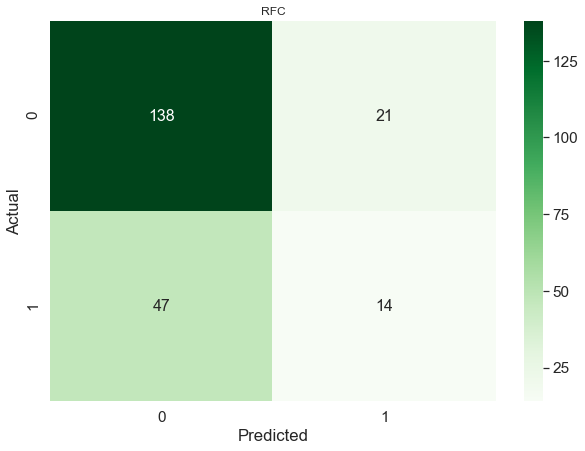

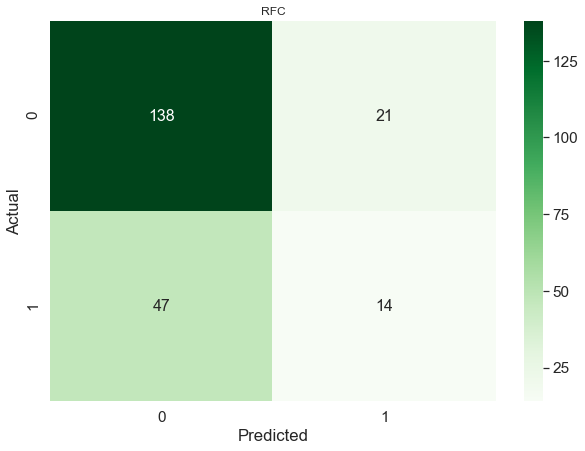

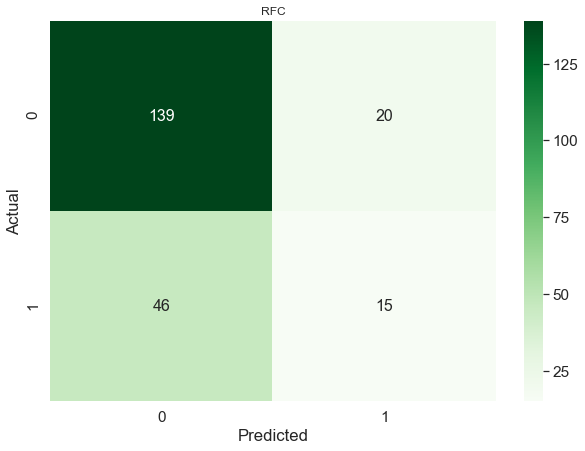

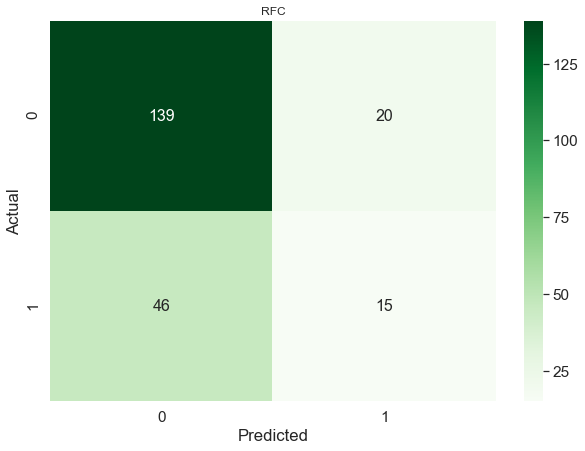

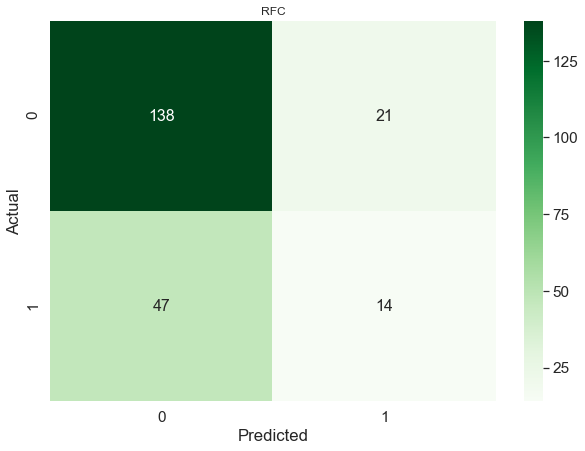

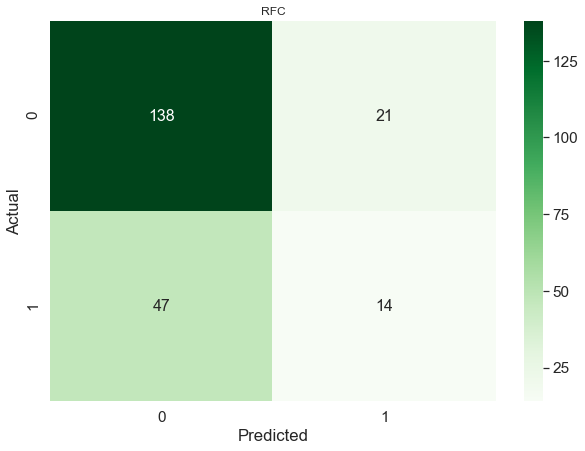

In [8]:
n_estimators = [300, 500, 1000]
max_depth = [7, 10, 12, 14]
params = [(x, y) for x in n_estimators for y in max_depth]
print(params)
auc_ls = []
f1_ls = []

# # Random Forest
# rfc = RandomForestClassifier(n_estimators=1100, max_depth = 3, random_state=19, n_jobs=-1)
# rfc.fit(X_train, y_train)

for i in params:
    rfc = RandomForestClassifier(n_estimators = i[0], max_depth = i[1])
    rfc.fit(X_train, y_train)
    auc = print_metrics(X_test, y_test, rfc, "RFC")[2]
    f1 = print_metrics(X_test, y_test, rfc, "RFC")[3]
    auc_ls.append(auc)
    f1_ls.append(f1)

[2.7 1.5 1.  2.  2.1 1.3 1.6 1.3 1.5 1.8 1.3 1.2]
[1.45 1.   1.31 1.09 1.17 1.24 1.48 1.17 1.24 1.   1.2  1.  ]


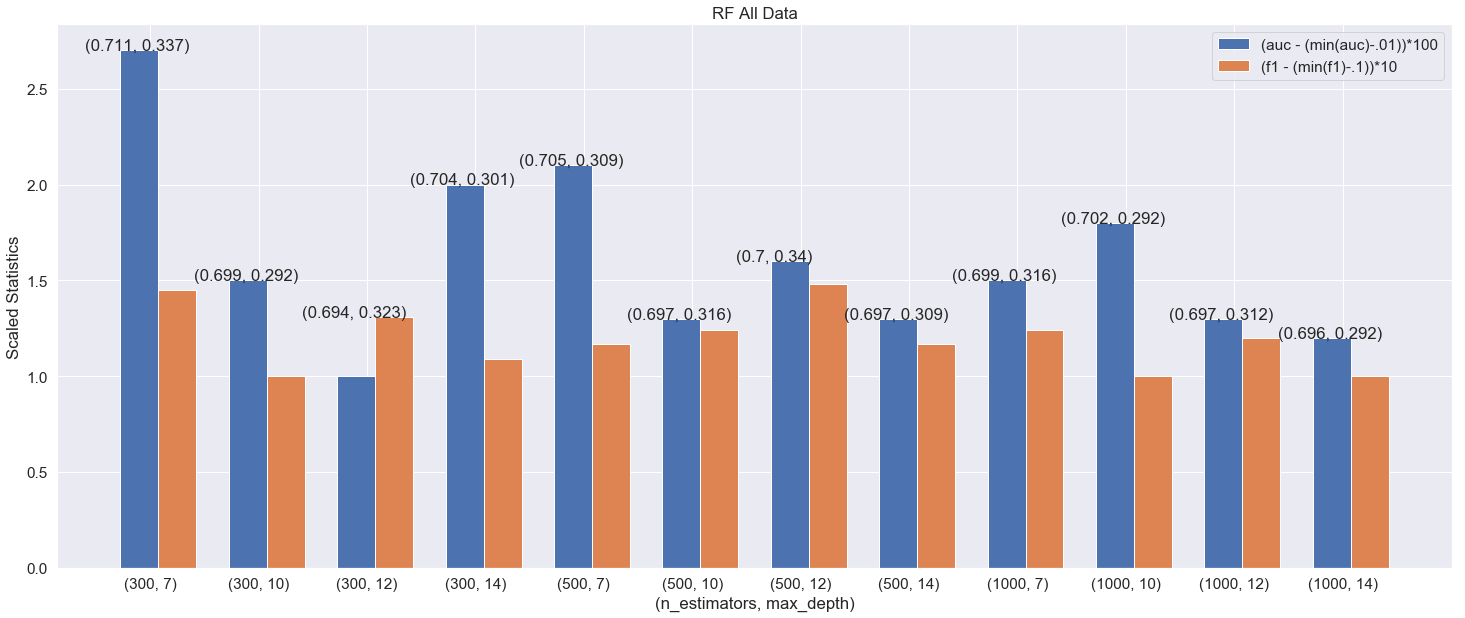

In [14]:
# Scale for plotting
scale_auc_ls = (auc_ls - (min(auc_ls)-.01))*100
print(scale_auc_ls)
scale_f1_ls = (f1_ls - (min(f1_ls)-.1))*10
print(scale_f1_ls)

# Plot
n_combos = len(params)
index = np.arange(n_combos)
axes = plt.gca()
bar_width = .35

aucs = plt.bar(index, scale_auc_ls, bar_width, label = "(auc - (min(auc)-.01))*100")
f1s = plt.bar(index+bar_width, scale_f1_ls, bar_width, label = "(f1 - (min(f1)-.1))*10")

plt.xticks(index+.1, params)
for i, v in enumerate(scale_auc_ls):
    plt.text(i - .5, max(scale_auc_ls[i], scale_f1_ls[i]), str((auc_ls[i], f1_ls[i])))

plt.xlabel("(n_estimators, max_depth)")
plt.ylabel("Scaled Statistics")
plt.title("RF All Data")
plt.legend()

In [10]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=1100, max_depth = 3, random_state=19, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=-1, oob_score=False, random_state=19, verbose=0,
                       warm_start=False)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


,Model,Accuracy,True Positive Rate,True Negative Rate,False Positive Rate,False Negative Rate,Sensitivity,Specificity,AUC,F1-Score,Geometric Mean,Kappa-Statistics,Sklearn Version
0,RF,0.718,0.23,0.906,0.094,0.77,0.23,0.906,0.698,0.311,0.456,0.161,0.22


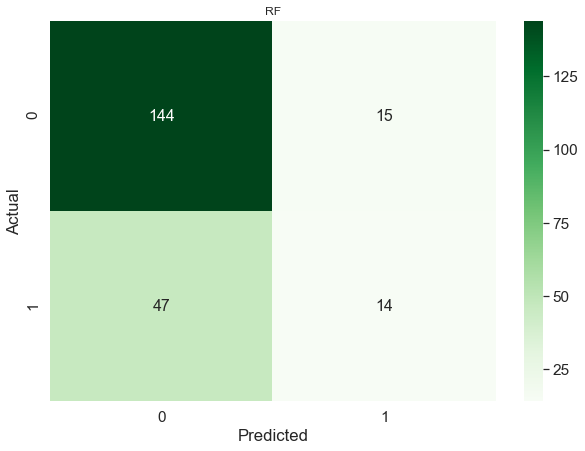

In [11]:
print_metrics(X_test, y_test, rfc, "RF")[1]

In [12]:
rfc.predict_proba(X_wimby_2019)

array([[0.87954493, 0.12045507],
       [0.54744832, 0.45255168],
       [0.84772091, 0.15227909],
       [0.84412997, 0.15587003],
       [0.83665707, 0.16334293],
       [0.88667315, 0.11332685],
       [0.86329678, 0.13670322],
       [0.86565804, 0.13434196],
       [0.87049969, 0.12950031],
       [0.52647674, 0.47352326],
       [0.8661331 , 0.1338669 ],
       [0.83927852, 0.16072148],
       [0.83655792, 0.16344208],
       [0.50126461, 0.49873539],
       [0.52440783, 0.47559217],
       [0.57504192, 0.42495808]])